### -_**IMPORT LIBRARIES**_-
- _Prediction_

In [10]:
import pandas as pd # Data handeling
import numpy as np # Math operation and matrix operations
import seaborn as sns # Visualize number of threes
import matplotlib.pyplot as plt # General visualization
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
df_machine_learning = pd.read_csv(r'../data/incidentes_limpio.csv', encoding='latin1')
df_machine_learning.head(10)

,fecha,hora,dia,periodo,clase,direccion,direccion_enc,tipo_geocod,gravedad,barrio,comuna,diseno,dia_nombre,mes,mes_nombre,longitud,latitud,x_origen_nacional,y_origen_nacional
0,05-05-2017,14:00:00,5,2017,Choque,CL 32 Norte CR 69,CL 032 069 000 00000,Malla vial,0,Rosales,Belén,Tramo de via,VIERNES,5,mayo,-75.589659,6.234581,4713547.511,2247612.977
1,06-06-2017,11:20:00,6,2017,Choque,CL 4 Sur CR 43 B,CL S 004 043 B 000 00000,Malla vial aproximada: CL S 4-43A,1,Patio Bonito,El Poblado,Tramo de via,MARTES,6,junio,-75.573137,6.200258,4715357.811,2243807.580
2,10-05-2017,12:00:00,10,2017,Choque,CL 40 CR 105,CL 040 105 000 00000,Malla vial,1,San Javier No.1,San Javier,Tramo de via,MIÉRCOLES,5,mayo,-75.619437,6.254631,4710262.497,2249847.020
3,12-05-2017,17:30:00,12,2017,Caida Ocupante,CL 28 CR 44,CL 028 044 000 00000,Malla vial,0,Barrio Colombia,El Poblado,Tramo de via,VIERNES,5,mayo,-75.571877,6.228411,4715512.454,2246920.875
4,14-04-2017,04:30:00,14,2017,Choque,CL 76 CR 80,CL 076 080 000 00000,Malla vial,0,Villa Flora,Robledo,Tramo de via,VIERNES,4,abril,-75.589420,6.277200,4713597.201,2252326.851
5,25-07-2017,10:20:00,25,2017,Choque,CL 73 CR 72 A,CL 073 072 A 000 00000,Malla vial,1,La Pilarica,Robledo,Tramo de via,MARTES,7,julio,-75.582038,6.273677,4714412.294,2251933.224
6,25-06-2017,22:50:00,25,2017,Atropello,CR 85 CL 76 C,CR 085 076 C 000 00000,Malla vial,0,Villa Flora,Robledo,Tramo de via,DOMINGO,6,junio,-75.591809,6.280282,4713334.460,2252669.055
7,30-05-2017,21:00:00,30,2017,Choque,CL 51 CR 45,CL 051 045 000 00000,Malla vial,1,La Candelaria,La Candelaria,Tramo de via,MARTES,5,mayo,-75.563642,6.248729,4716434.899,2249163.703
8,02-05-2017,06:20:00,2,2017,Choque,CR 44 CL 78,CR 044 078 000 00000,Malla vial,0,Campo Valdés No. 2,Manrique,Interseccion,MARTES,5,mayo,-75.553360,6.270893,4717584.918,2251609.674
9,24-07-2017,10:20:00,24,2017,Choque,CL 47 CR 36 A,CL 047 036 A 000 00000,Malla vial,1,Buenos Aires,Buenos Aires,Tramo de via,LUNES,7,julio,-75.558739,6.241603,4716973.768,2248372.883


### _**MACHINE LEARNING PROCESS**_
- Random Forest Classification
- KFold (cross validation)
- Classification report
- Confusion Matrix


In [6]:
X = df_machine_learning[['dia', 'hora', 'periodo', 'clase', 'barrio', 'comuna', 'latitud', 'longitud']]  # Características
y = df_machine_learning['gravedad']  # Variable objetivo

# Codificación de variables categóricas (Label Encoding o One-Hot Encoding)
X = pd.get_dummies(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Restablecer índices para evitar problemas con índices no consecutivos
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

n_trees = range(10, 200, 10)  # Rango de 10 a 200 para n_estimators
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Validación cruzada con KFold

results = []  # Para guardar los resultados de cada configuración de n_trees

for n in n_trees:
    fold_scores = []  # Puntajes de cada fold
    for train_index, val_index in kf.split(X):
        # Dividir datos de entrenamiento y validación
        X_train, X_test = X.iloc[train_index], X.iloc[val_index]
        y_train, y_test = y.iloc[train_index], y.iloc[val_index]

        # Crear y entrenar el modelo
        cls = RandomForestClassifier(n_estimators=n, random_state=42)
        cls.fit(X_train, y_train)

        # Predecir y evaluar en el conjunto de validación
        y_pred = cls.predict(X_test)
        fold_scores.append(accuracy_score(y_test, y_pred))

    # Calcular el promedio de las validaciones cruzadas y guardarlo
    average_score = np.mean(fold_scores)
    results.append(average_score)

# Identificar el mejor número de árboles
best_n_trees = results.index(max(results))
print(f"La mejor cantidad de árboles es: {n_trees[best_n_trees]} con un promedio de accuracy de: {max(results)}")

La mejor cantidad de árboles es: 180 con un promedio de accuracy de: 0.754967756070106


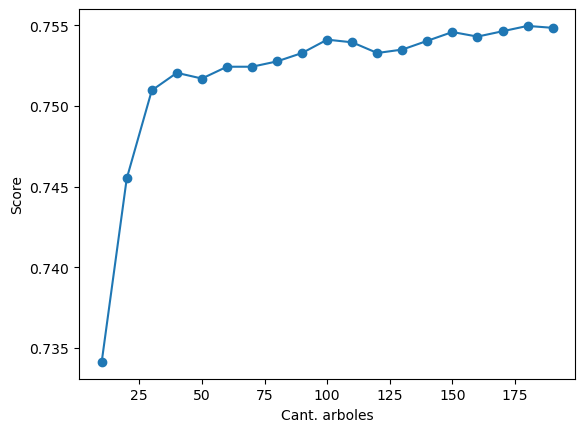

In [13]:
#Graficamos la cantidad de arboles respecto a su exactitud
plt.plot(n_trees, results, marker='o', linestyle='-')

# Nombramos los ejes
plt.xlabel('Cant. arboles')
plt.ylabel('Score')

# Mostramos el gráfico
plt.show()

In [14]:
#Instanciamos al modelo con la mejor cantidad de arboles
cls = RandomForestClassifier(n_estimators=180, random_state=42)

#Dividimos los datos en datos de prueba y datos de test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

#Entrenamos al modelo
cls.fit(X_train, y_train)

#Predecimos
predicted = cls.predict(X_test)
expected = y_test

In [15]:
#Hallamos la exactitud del modelo (Precision)
accuracy = accuracy_score(expected, predicted)
print("Exactitud:", accuracy)

Exactitud: 0.747445117335352


In [ ]:
# Hallamos el reporte de clasificacion
report = classification_report(expected, predicted)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74      5657
           1       0.69      0.83      0.75      4911

    accuracy                           0.75     10568
   macro avg       0.76      0.75      0.75     10568
weighted avg       0.76      0.75      0.75     10568



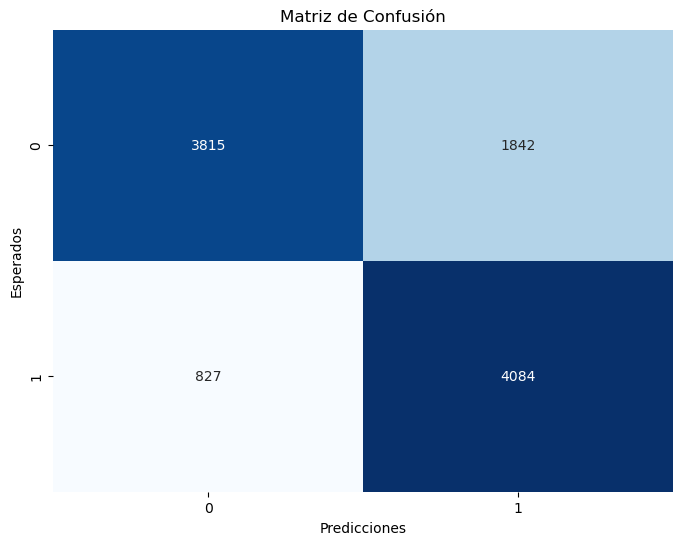

In [17]:
# Convertimos expected y predicted a pandas Series para usar replace
#HERIDO: 0, SOLO DAÑOS: 1

# Calculamos la matriz de confusión
confusion = confusion_matrix(expected, predicted)

# Mostramos la matriz de confusión usando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Esperados")
plt.title("Matriz de Confusión")
plt.show()
